# Lab Assignment #1 "Linear Regression"
### Completed by Yelyzaveta Ahapova (Group DA-01)

#### 1. Visualize the data from lab1_train.csv.

In [20]:
# Making the imports
import numpy as np
import matplotlib.pyplot as plt
import csv

In [50]:
# Function to read the data
def read_csv(file_name, header=True, delimiter=","):
    with open(file_name, newline='') as f:
        reader = csv.reader(f, delimiter=delimiter)
        if header:
            next(reader) 
        data = [row for row in reader]
    return data

In [34]:
# Read test and train sets
train_dataset = read_csv("lab_1_train.csv")
test_dataset = read_csv("lab_1_test.csv")

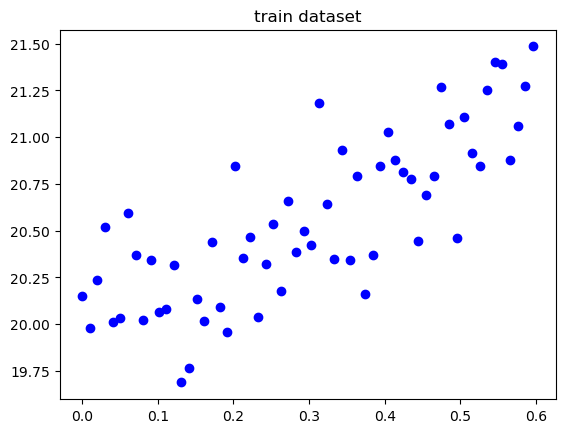

In [56]:
# Visualize train data set 
plt.title("train data set")
x = [float(row[1]) for row in train_dataset]
y = [float(row[2]) for row in train_dataset]
plt.plot(x, y, 'bo')

#### 2. Implement a linear regression to predict 'y' values. After each epoch, print the current values of the weights and the loss function. Use Mean Squared Error as the loss function.

In [51]:
def linear_regression(b0, b1, x):
    return b0 + np.multiply(b1, x)

def MSE_loss_function(b0, b1, x, y):
    y_predicted = [linear_regression(b0, b1, x_i) for x_i in x]
    result = np.square(np.subtract(np.array(y), np.array(y_predicted))).mean()
    return result

In [37]:
tolerance = 0.000001 # tolerance value
lr = 0.01 # learning rate

b0 = float(abs(np.random.randn(1)))
b1 = float(abs(np.random.randn(1)))

loss = MSE_loss_function(b0, b1, x, y)
delta = loss
epoch = 0

while tolerance < delta:
    predicted_y = [linear_regression(b0, b1, x_i) for x_i in x]
    difference = [(actual_y - predicted_y) for (actual_y, predicted_y) in zip(y, predicted_y)]
    derivative_b0 = - 2  * np.array(difference).mean()
    derivative_b1 = - 2 * np.array([(x_i * difference_i) for (x_i, difference_i) in zip (x, difference)]).mean()
    b0 -= np.multiply(lr, derivative_b0)
    b1 -= np.multiply(lr, derivative_b1)
    print(f'{epoch}: b0 = {b0}; b1 = {b1}; loss function value = {loss}')
    delta = np.subtract(loss, MSE_loss_function(b0, b1, x, y))
    loss = MSE_loss_function(b0, b1, x, y)
    epoch += 1
    

0: b0 = 0.8623650416193411; b1 =  0.5855340124864061; loss function value =  398.0405579678275
1: b0 = 1.252619458472703; b1 =  0.7026746316055983; loss function value =  380.87871008778444
2: b0 = 1.6343706762285908; b1 =  0.8172097776664775; loss function value =  364.45784752228207
3: b0 = 2.0078042864356647; b1 =  0.9291963477829872; loss function value =  348.7459762445836
4: b0 = 2.3731018297278017; b1 =  1.0386899971565637; loss function value =  333.7124836569339
5: b0 = 2.730440884243688; b1 =  1.1457451661834543; loss function value =  319.3280789436109
6: b0 = 3.0799951521164695; b1 =  1.2504151069703628; loss function value =  305.5647359993952
7: b0 = 3.4219345440755906; b1 =  1.3527519092713347; loss function value =  292.3956388222597
8: b0 = 3.7564252622020184; b1 =  1.4528065258585172; loss function value =  279.79512926387645
9: b0 = 4.083629880877166; b1 =  1.55062879733915; loss function value =  267.73865703613853
10: b0 = 4.403707425964936; b1 =  1.646267476430873

#### 3. After the gradient descent has converged, calculate the loss function on the test data from lab1_test.csv.

In [48]:
test_x = [float(row[1]) for row in test_dataset]
test_y = [float(row[2]) for row in  test_dataset]
MSE_loss_function(b0, b1, test_x, test_y)

0.07538463635290693

#### 4. Visualize the data from lab1_train.csv, lab1_test.csv, and the line to which the solution converged on one plot.

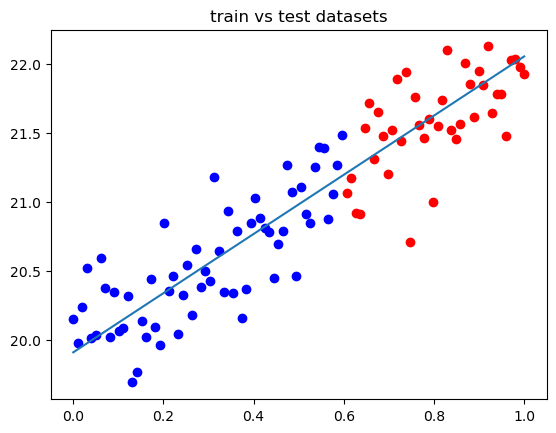

In [55]:
plt.title("train vs test data sets")
plt.plot(x, y, 'bo', test_x, test_y, 'ro', [0, 1], [linear_regression(b0, b1, 0), linear_regression(b0, b1, 1)])